Import necessary things

In [25]:
from collision_sim import ParticleEnviroment
from particle_simulation import approximate_collisions
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Create and run sim

In [26]:
run_time = 25
num_particles = 1000
sigma = 2
length = 10
num_measurements = 5
num_subplot_rows = 2
num_subplot_cols = int(num_measurements/num_subplot_rows if num_measurements % num_subplot_rows  == 0 \
                   else (num_measurements + (num_subplot_rows - (num_measurements % num_subplot_rows)))/num_subplot_rows)  
expected_max_collisions = 20 #this is hacky 

sim_enviroment = ParticleEnviroment(
    num_particles = num_particles,
    run_time = run_time,
    init_velocity = 'random', #can either be 'random' or 'unit_horizontal'
    circle_radius = sigma,
    box_length = length,
    num_measurements = num_measurements 
)

sim_enviroment.run_sim()

Sim complete total collisions: 4051


calculate lambda as cross section of circle over free area

In [27]:
lmd = (2*sigma)/(length**2 - math.pi*sigma**2)

Plot sim results against expected from poisson

<Axes: >

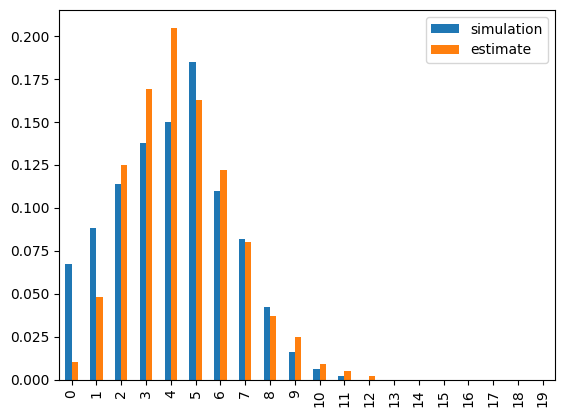

In [28]:
buckets = np.zeros(expected_max_collisions) 
for particle in sim_enviroment.particles.values():
    buckets[particle['number_collisions']] += 1

buckets /= num_particles
categories = np.arange(expected_max_collisions)
buckets_approx = np.zeros(expected_max_collisions)

collision_counts = approximate_collisions(
    num_particles = num_particles,
    lmb = lmd,
    tau = run_time
)

for i, _ in enumerate(collision_counts):
    buckets_approx[collision_counts[i]] += 1
buckets_approx /= num_particles

df = pd.DataFrame({'simulation': buckets})
df['estimate'] = buckets_approx

df.plot.bar()

In [29]:
time_steps = [0]
for i in range(1, num_measurements):
    time_steps.append(i*(run_time/num_measurements))

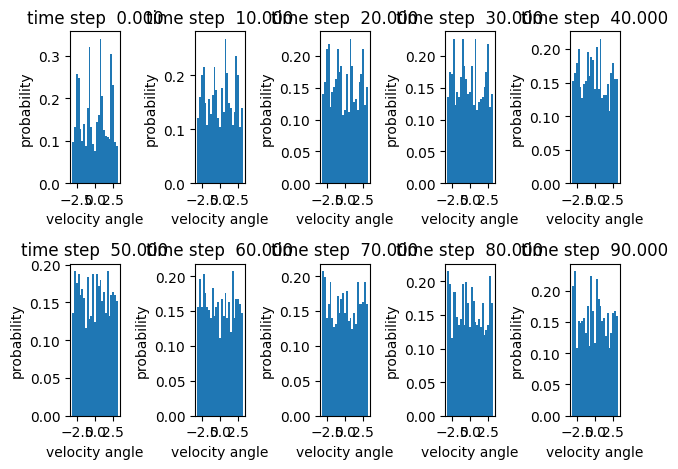

In [30]:
fig, axs = plt.subplots(num_subplot_rows, num_subplot_cols)
for i in range(num_subplot_rows):
    for j in range(num_subplot_cols):
        if len(time_steps) - 1 >= i*num_subplot_cols + j:
            axs[i, j].hist(sim_enviroment.velocity_angles[f'time_{time_steps[i*num_subplot_cols + j]}'], bins = 25, density = True)
            axs[i, j].set_title(f'time step {time_steps[i*num_subplot_cols + j]: .3f}')

for ax in axs.flat:
    ax.set(xlabel='velocity angle', ylabel='probability')
    

plt.tight_layout()
plt.show()
